In [30]:
import sys
import minorminer
import numpy as np
sys.path.append('../../lib/')
import matplotlib.pyplot as plt 
import matplotlib.colors as mpl_color
import networkx as nx, dwave_networkx as dnx
from frustration_graph import bqm_frustration

Frustrated Ising Graph

In [8]:
L = 20
Lattice_Size = (L, L)
G = nx.grid_graph(dim=Lattice_Size, periodic=False)
G1 = nx.Graph()

In [9]:
for x in range(L-1):
    for y in range(L-1):
        # diagonals on right
        G1.add_edge((x,y), (x+1, y+1))
        G1.add_edge((x + 1,y), (x, y+1))

In [10]:
pos = {}
for node in G.nodes:
    x, y = node
    pos[node] = (y, -x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


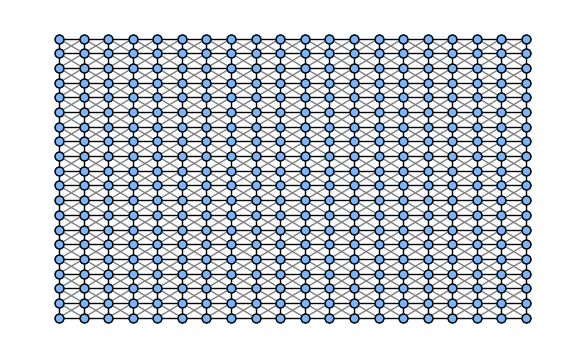

In [28]:
width = 5.949973986 # in inches
ratio = (np.sqrt(5.0) - 1.0) / 2.0

fig = plt.figure(figsize=(width, width * ratio))
fig.set_tight_layout({'pad': 0})

nx.draw_networkx(G1, pos=pos, node_size=40, with_labels=False, edge_color='gray')
nx.draw_networkx_nodes(G, pos=pos, node_color=[123/255, 180/255, 248/255], edgecolors='k', node_size=40)
nx.draw_networkx_edges(G, pos=pos)
plt.axis('off')
plt.tight_layout()
#plt.savefig("../../Images/Ising_Frustrated/F_Ising_Model.pdf")

Embedding on Pegasus Graph

In [26]:
L = 4
ratio = 0.6
bqm = bqm_frustration(L, ratio, 0)
G = bqm.to_networkx_graph()
P3 = dnx.pegasus_graph(3)

/var/folders/n0/n_774_jn7xl995kx2k1sp9dw0000gn/T/ipykernel_6745/65304762.py:4: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0. Use bqm.to_networkx_graph() instead.
  G = bqm.to_networkx_graph()


In [33]:
pos = {}
for node in G.nodes:
    split = node.split('-')
    x, y = int(split[0]), int(split[1])
    pos[node] = (y, -x)

In [55]:
emb = minorminer.find_embedding(G, P3, random_seed = 1)

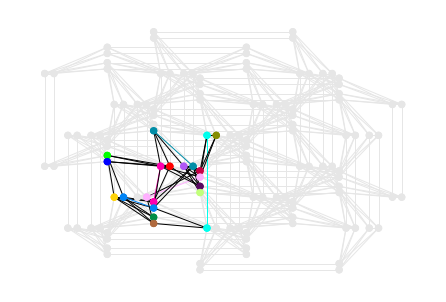

In [28]:
dnx.draw_pegasus_embedding(P3, emb, G, node_size=40)

In [51]:
def color(i, n):
    r, g, b = mpl_color.hsv_to_rgb((i/n, .25 + (i%4)/4, 1))
    return r, g, b, 1.

def double_plot(S, T, emb, params):
    fig = plt.figure(figsize = (40, 20))
    axes = fig.subplots(nrows=1, ncols=2)
    
    n = len(S)
    colors = {v: color(i, n) for i, v in enumerate(S)}

    node_colors = list(colors[v] for v in S)

    if params[0].get('pos') is None:
        params[0]['pos'] = nx.kamada_kawai_layout(S)

    nx.draw(S,
            node_color = node_colors,
            ax = axes[0],
            **params[0])

    dnx.draw_pegasus_embedding(T, emb, S,
                               crosses = True, 
                               chain_color = colors,
                               ax = axes[1],
                               **params[1])


    fig.tight_layout()

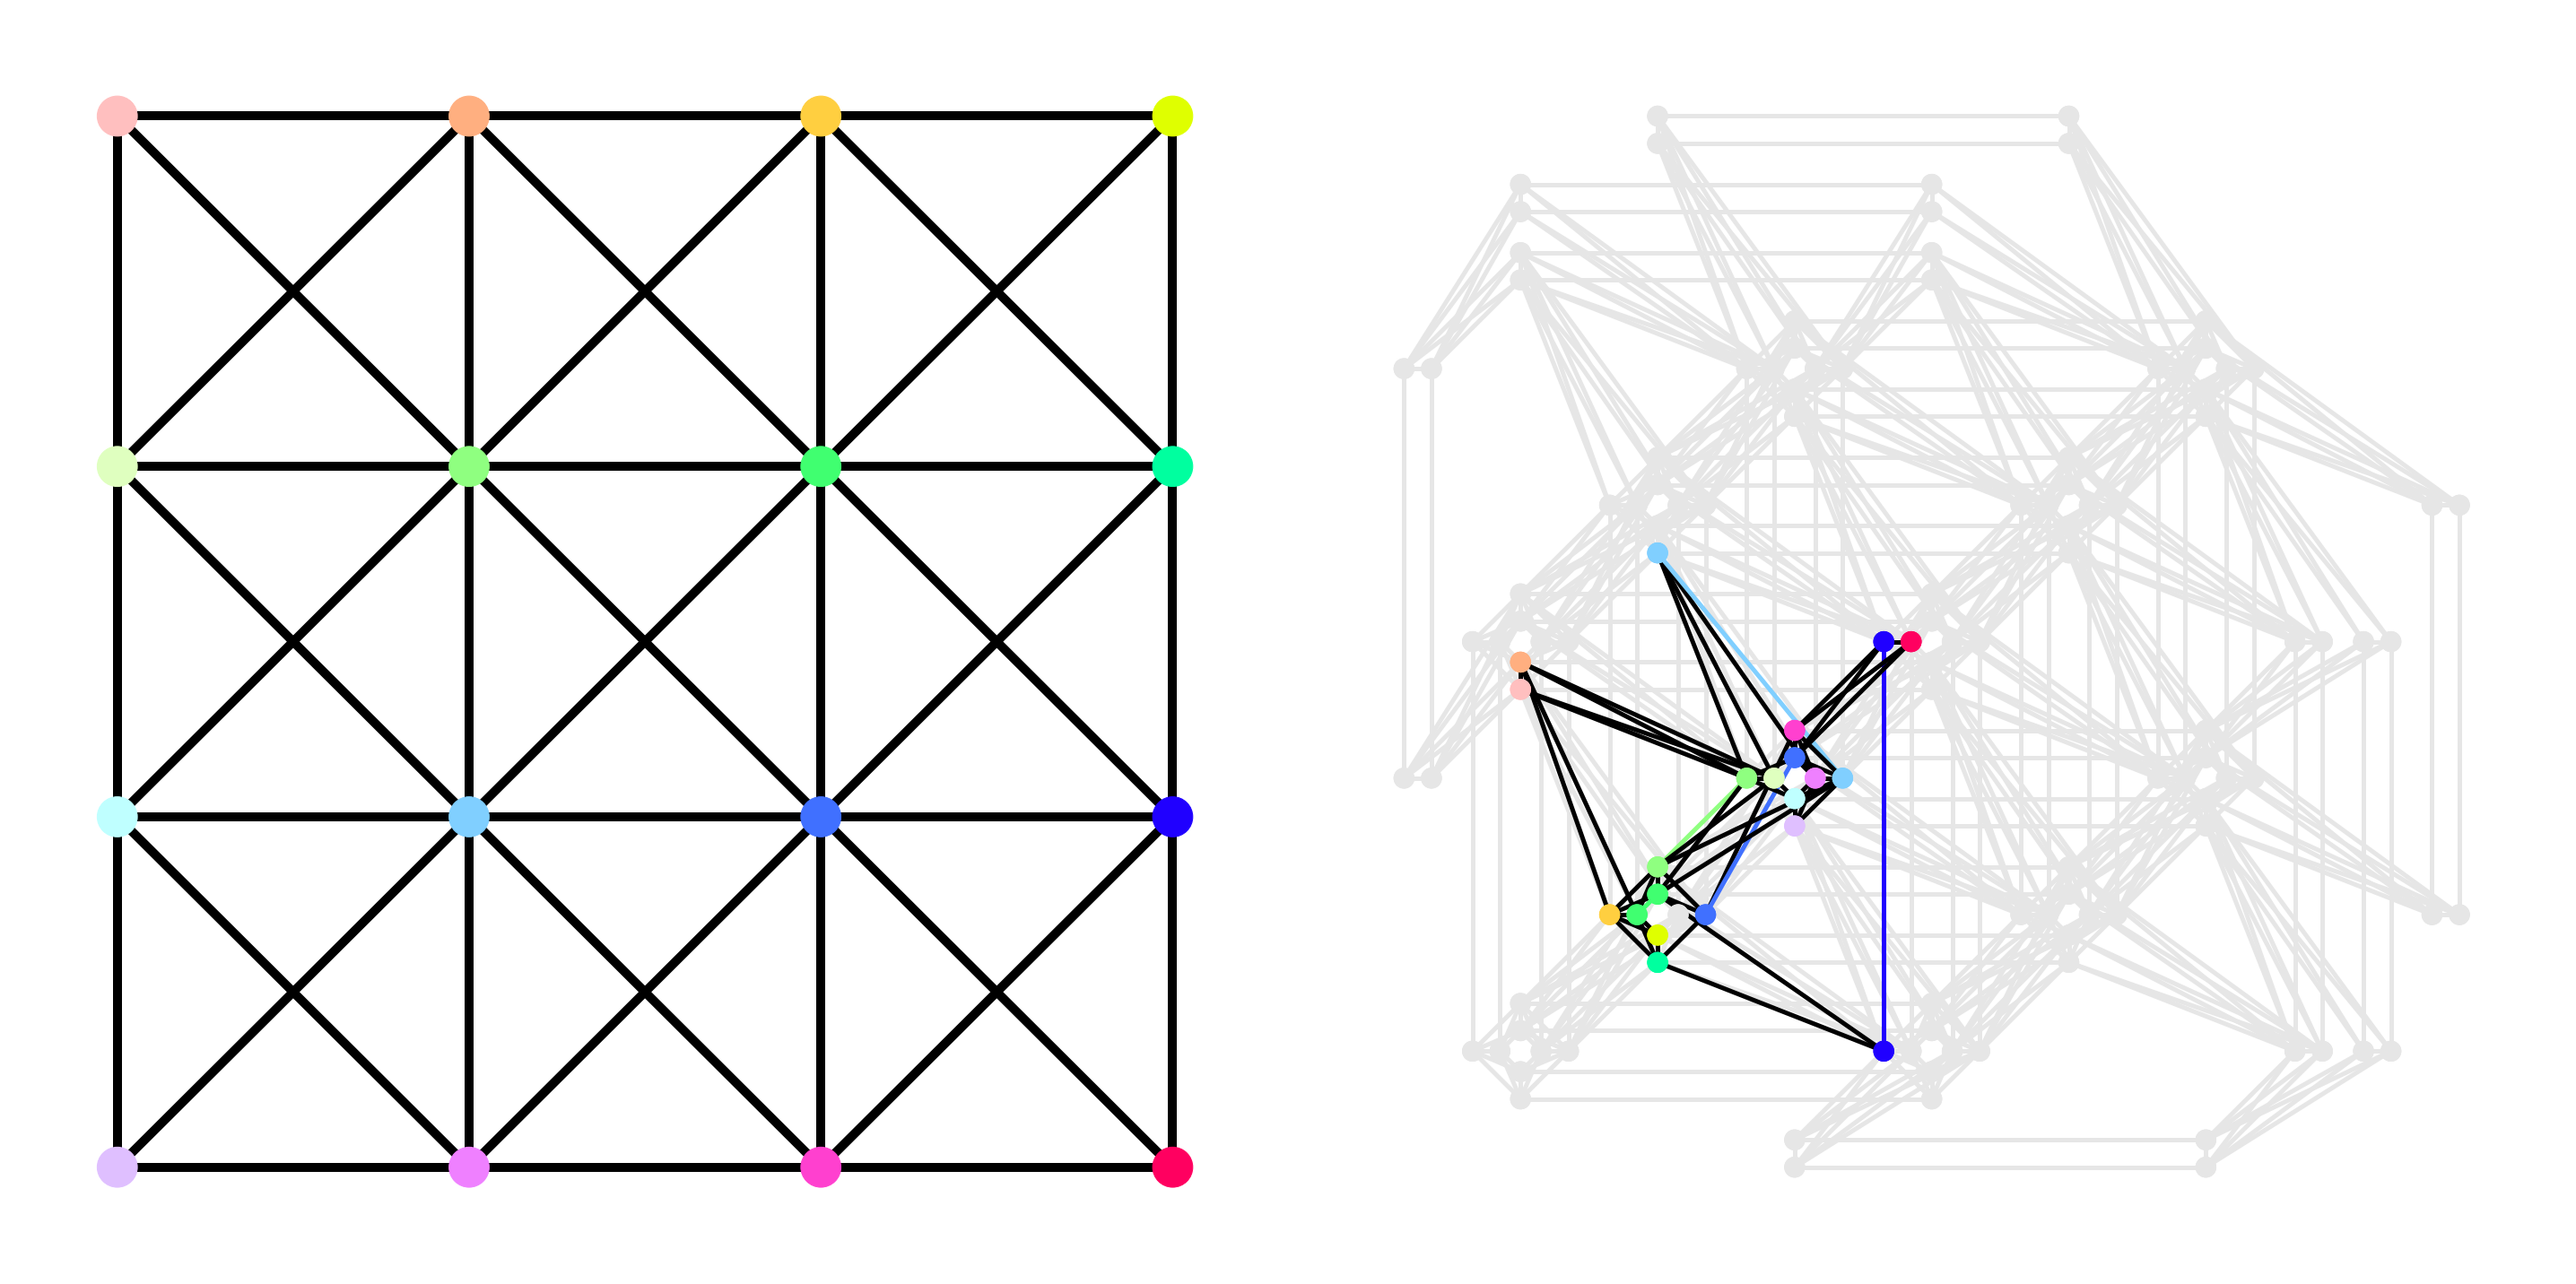

In [56]:
double_plot(G, P3, emb, [{'node_size': 2000, 'pos': pos, 'width': 10, 
                 'edge_color': 'k'}, {'node_size': 500, 'width': 5}])